In [1]:
import csv
from random import randrange
import operator
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dataPreparation(DataFile):
    DataSet = np.genfromtxt(DataFile, delimiter=',')
    return DataSet

In [3]:
def data_split(dataset, kFold=3):
    dataset_split = list()
    dataset_copy = list(dataset)
    j = len(dataset_copy)
    kFold_size = int(len(dataset) / kFold)
    for i in range(kFold):
        fold = list()
        while len(fold) < kFold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [4]:
def euclideanDistance(testInstance, tainingInstance, length):
    distance = 0
    '''#print('testInstance[0]',int(testInstance[0]))
    #print('tainingInstance[1]',int(tainingInstance[1]))
    for ed in range(1,length):
        distance += pow((int(testInstance[ed]) - int(tainingInstance[ed])), 2)
        #print('testInstance[ed]',int(testInstance[ed]))
        #print('tainingInstance[ed]',int(tainingInstance[ed]))'''
    #print(type(tainingInstance))
    distance = np.sqrt(np.sum(np.power(tainingInstance-testInstance, 2)))
    
    #return math.sqrt(distance)
    return distance

In [5]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)
    #print(length)
    #print('Test Instance',testInstance)
    #print('Training Instance[0]',trainingSet[0])
    for y in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[y], length)
        distances.append((trainingSet[y], dist))
    #print('euclideanDistance',datetime.datetime.now())
    distances.sort(key=operator.itemgetter(1))
    #print('distances sorted is',distances[1])
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    
    return neighbors

In [6]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][0]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    #print('getResponse',datetime.datetime.now())
    return sortedVotes[0][0]

In [7]:
def getAccuracy(testSet, predictions):
    correct = 0
    #print('test set is',testSet)
    for x in range(len(testSet)):
        #print('test set is',testSet)
        if testSet[x][0] == predictions[x]:
            correct += 1
    #print('getAccuracy',datetime.datetime.now())
    return (correct/float(len(testSet))) * 100.0

In [19]:
#TEST DATA
def errorsForData(trainingSet,testSet,k):
    errorsPlotTest = []
    predictions=[]
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        #print('training set size is',len(trainingSet))
        #print('testSet[x]=', testSet[x])
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][0]))
        #print('testset(',str(x),') is ',datetime.datetime.now())
    accuracy = getAccuracy(testSet, predictions)
    testAcc = repr(accuracy)
    print('Accuracy for test set of k = '+str(k)+' is: ' + testAcc + '%')
    testAccFloat = float(testAcc)
    error = 1-(testAccFloat/100)
    #print('error from function is ',error)
    return error

In [9]:
trainingSet = dataPreparation('MNIST_train_small.csv')

In [20]:
errorsOverall = {'1':[],'2':[],'3':[],'4':[],'5':[],'6':[],'7':[],'8':[],'9':[],'10':[],
              '11':[],'12':[],'13':[],'14':[],'15':[],'16':[],'17':[],'18':[],'19':[],'20':[]}
errorsOverallPlot = []
for k in range(1,21):
    startTime = datetime.datetime.now()
    print('Start time for testSet k = ',str(k),' is: ', startTime)
    DataFold = data_split(trainingSet,k)
    errors = 0
    if k == 1:
        errors = errorsForData(DataFold,DataFold,k)
    else:
        for itr1 in range(k):
            DataSetTest = DataFold[itr1]
            DataSetTrain = []
            for itr2 in range(k):
                if(itr2 != itr1):
                    DataSetTrain += DataFold[itr2]
                    print(len(DataSetTrain))
                else:
                    print(itr1)
            errors += errorsForData(DataSetTrain,DataSetTest,k)
            #print('errors is ',errors)
    errorsAvg = errors/k
    #print('errorsAvg is ',errorsAvg)
    kStr = str(k)
    errorsOverall[kStr].append(errorsAvg)
    errorsOverallPlot.append(errorsAvg)
    endTime = datetime.datetime.now()
    print('End time for testSet k = ',str(k), ' is: ', endTime)
    diffTime = endTime - startTime
    print('Time took is for k = ',kStr,'is: ', divmod(diffTime.total_seconds(), 60))
    print ('error for k = ',kStr, 'is: ',errorsAvg)
print('errors is: ',errorsOverall)


Start time for testSet k =  2  is:  2019-03-01 01:16:41.907966
0
1500
Accuracy for test set of k = 2 is: 87.66666666666667%
1500
1
Accuracy for test set of k = 2 is: 88.46666666666667%
End time for testSet k =  2  is:  2019-03-01 01:18:11.347869
Time took is for k =  2 is:  (1.0, 29.439903)
error for k =  2 is:  0.11933333333333329
Start time for testSet k =  3  is:  2019-03-01 01:18:11.347869
0
1000
2000
Accuracy for test set of k = 3 is: 90.7%
1000
1
2000
Accuracy for test set of k = 3 is: 91.9%
1000
2000
2
Accuracy for test set of k = 3 is: 91.9%
End time for testSet k =  3  is:  2019-03-01 01:20:12.053225
Time took is for k =  3 is:  (2.0, 0.7053559999999948)
error for k =  3 is:  0.08499999999999996
Start time for testSet k =  4  is:  2019-03-01 01:20:12.053225
0
750
1500
2250
Accuracy for test set of k = 4 is: 90.53333333333333%
750
1
1500
2250
Accuracy for test set of k = 4 is: 90.53333333333333%
750
1500
2
2250
Accuracy for test set of k = 4 is: 91.33333333333333%
750
1500
2250

Accuracy for test set of k = 12 is: 90.0%
250
500
750
1000
1250
5
1500
1750
2000
2250
2500
2750
Accuracy for test set of k = 12 is: 89.2%
250
500
750
1000
1250
1500
6
1750
2000
2250
2500
2750
Accuracy for test set of k = 12 is: 87.2%
250
500
750
1000
1250
1500
1750
7
2000
2250
2500
2750
Accuracy for test set of k = 12 is: 90.4%
250
500
750
1000
1250
1500
1750
2000
8
2250
2500
2750
Accuracy for test set of k = 12 is: 90.8%
250
500
750
1000
1250
1500
1750
2000
2250
9
2500
2750
Accuracy for test set of k = 12 is: 90.4%
250
500
750
1000
1250
1500
1750
2000
2250
2500
10
2750
Accuracy for test set of k = 12 is: 90.8%
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
11
Accuracy for test set of k = 12 is: 89.2%
End time for testSet k =  12  is:  2019-03-01 01:43:16.052453
Time took is for k =  12 is:  (2.0, 43.04813100000001)
error for k =  12 is:  0.09900000000000002
Start time for testSet k =  13  is:  2019-03-01 01:43:16.052453
0
230
460
690
920
1150
1380
1610
1840
2070
2300
2530
2760
Ac

Accuracy for test set of k = 16 is: 92.51336898395722%
187
374
561
748
935
1122
1309
1496
1683
1870
2057
2244
2431
2618
2805
15
Accuracy for test set of k = 16 is: 90.9090909090909%
End time for testSet k =  16  is:  2019-03-01 01:54:16.911843
Time took is for k =  16 is:  (2.0, 46.621578)
error for k =  16 is:  0.10093582887700533
Start time for testSet k =  17  is:  2019-03-01 01:54:16.912835
0
176
352
528
704
880
1056
1232
1408
1584
1760
1936
2112
2288
2464
2640
2816
Accuracy for test set of k = 17 is: 93.18181818181817%
176
1
352
528
704
880
1056
1232
1408
1584
1760
1936
2112
2288
2464
2640
2816
Accuracy for test set of k = 17 is: 90.3409090909091%
176
352
2
528
704
880
1056
1232
1408
1584
1760
1936
2112
2288
2464
2640
2816
Accuracy for test set of k = 17 is: 90.9090909090909%
176
352
528
3
704
880
1056
1232
1408
1584
1760
1936
2112
2288
2464
2640
2816
Accuracy for test set of k = 17 is: 94.31818181818183%
176
352
528
704
4
880
1056
1232
1408
1584
1760
1936
2112
2288
2464
2640
2816

Accuracy for test set of k = 20 is: 88.66666666666667%
150
1
300
450
600
750
900
1050
1200
1350
1500
1650
1800
1950
2100
2250
2400
2550
2700
2850
Accuracy for test set of k = 20 is: 93.33333333333333%
150
300
2
450
600
750
900
1050
1200
1350
1500
1650
1800
1950
2100
2250
2400
2550
2700
2850
Accuracy for test set of k = 20 is: 87.33333333333333%
150
300
450
3
600
750
900
1050
1200
1350
1500
1650
1800
1950
2100
2250
2400
2550
2700
2850
Accuracy for test set of k = 20 is: 94.0%
150
300
450
600
4
750
900
1050
1200
1350
1500
1650
1800
1950
2100
2250
2400
2550
2700
2850
Accuracy for test set of k = 20 is: 88.66666666666667%
150
300
450
600
750
5
900
1050
1200
1350
1500
1650
1800
1950
2100
2250
2400
2550
2700
2850
Accuracy for test set of k = 20 is: 90.66666666666666%
150
300
450
600
750
900
6
1050
1200
1350
1500
1650
1800
1950
2100
2250
2400
2550
2700
2850
Accuracy for test set of k = 20 is: 90.0%
150
300
450
600
750
900
1050
7
1200
1350
1500
1650
1800
1950
2100
2250
2400
2550
2700
2850
Accu

In [49]:
errorsOverallPlot = [0.0,0.119,0.085,0.094,0.088,0.091,0.091,0.093,0.092,0.095,0.095,0.099,0.096,0.099,0.098,0.101,0.101,0.102,0.101,0.108]
print(errorsOverallPlot)

[0.0, 0.119, 0.085, 0.094, 0.088, 0.091, 0.091, 0.093, 0.092, 0.095, 0.095, 0.099, 0.096, 0.099, 0.098, 0.101, 0.101, 0.102, 0.101, 0.108]


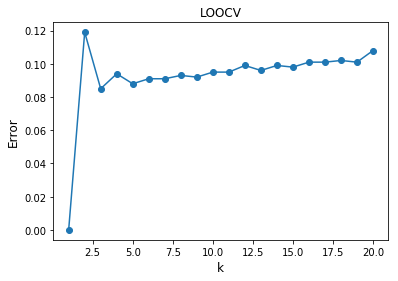

In [52]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xlabel('k',fontsize = 12)
plt.ylabel('Error',fontsize = 12)
plt.title('LOOCV',fontsize = 12)
plt.plot(x,errorsOverallPlot,'-o')
plt.show()